In [1]:
import torch
words = open('names.txt').read().splitlines()

In [2]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
itos = {i+1:s for i,s in enumerate(chars)}
stoi.update({'.': 0})
itos.update({0: '.'})

tupfromix = lambda ix: (ix // 27, ix % 27)
ixfromtup = lambda tup: tup[0]*27+tup[1]

In [3]:
import numpy as np

counts = torch.ones((27*27,27), dtype=torch.int32)


for w in words:
    chr = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chr, chr[1:], chr[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        counts[ixfromtup((ix1,ix2)),ix3] += 1

P = counts / counts.sum(dim=-1, keepdim=True)

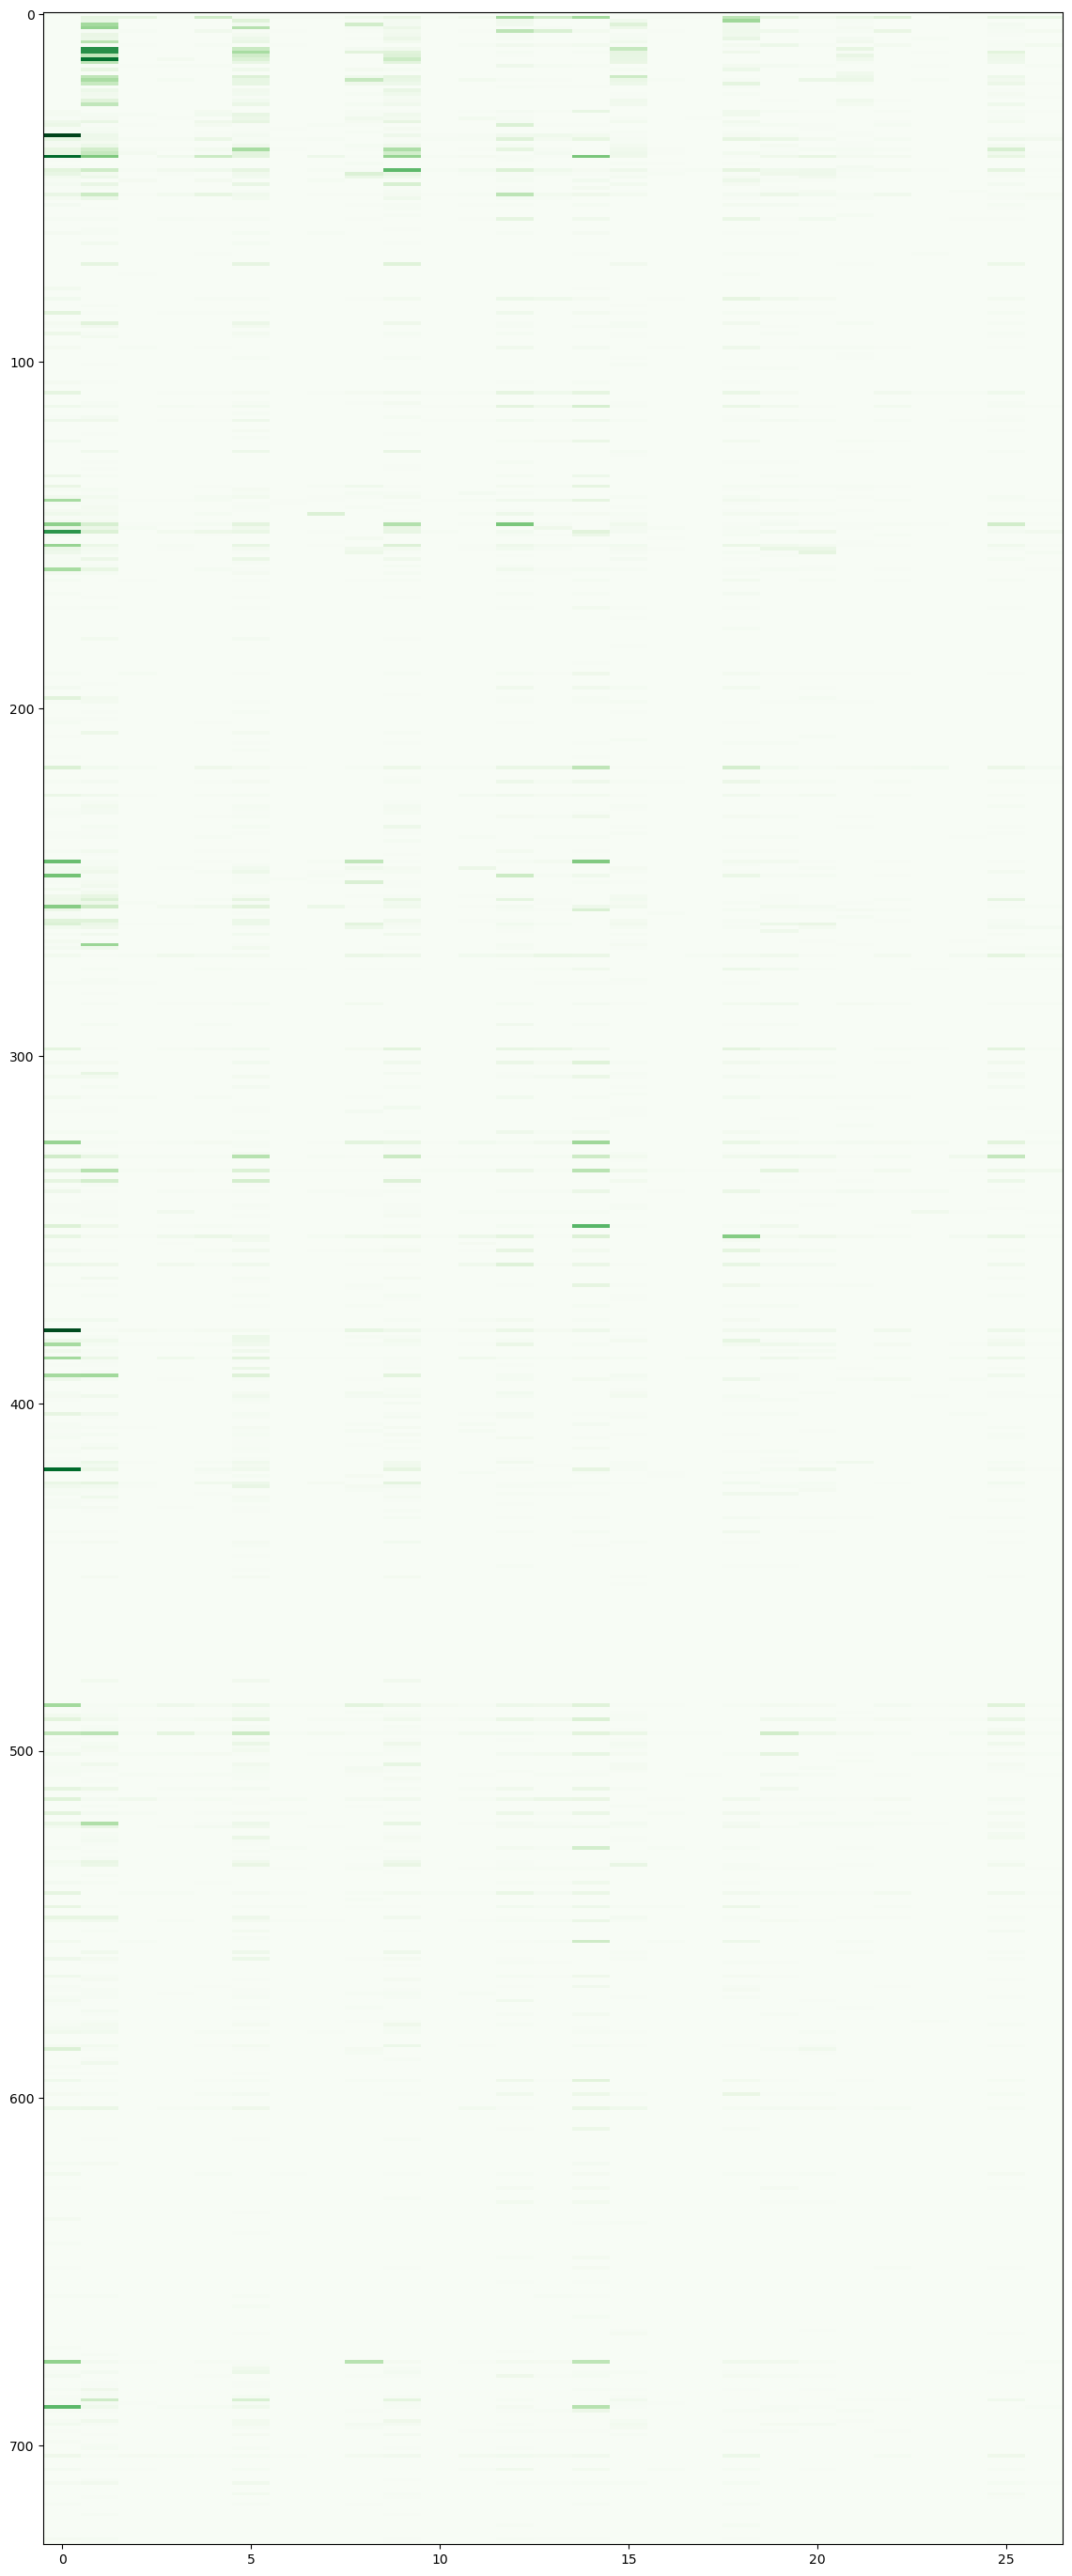

In [8]:
import matplotlib.pyplot as plt

first_letter_ix = 0
plt.figure(figsize=(14,35))
plt.imshow(counts, cmap='Greens',aspect='auto')
# for i in range(27*27):
#     for j in range(27):
#         chstr = itos[tupfromix(i)[0]] + itos[tupfromix(i)[1]] + itos[j]
#         plt.text(j, i, itos[first_letter_ix]+chstr, ha='center', va='bottom', color='black')
#         plt.text(j, i, counts[i,j].item(), ha='center', va='top', color='black')
# plt.axis('off')

In [5]:

for i in range(20):
    sample = '.'
    ixs = torch.randint(1,26,(1,)).item()
    sample += itos[ixs]
    while True:
        ch1, ch2 = list(sample[-2:])
        ix2 = ixfromtup((stoi[ch1],stoi[ch2]))
        p = P[ix2]
        ixs = torch.multinomial(p,1,replacement=True)
        sample += itos[ixs.item()]
        if itos[ixs.item()] == '.':
            break
    print(sample[1:-1])



anisty
frall
briereo
olarkxzmyah
yohaelseegamyrosiyalesmbalyn
onazaipjyan
ivee
jayeliya
dena
haoise
dur
hallielrwyntalane
jaileyah
ir
darina
trezwoor
anisellannenkson
ish
pazen
olionniyah


In [7]:
def return_prob(str):
    l1, l2, l3 = list(str)
    ix = ixfromtup((stoi[l1],stoi[l2]))
    return P[ix, stoi[l3]].item()

for w in ['casper', 'johannes', 'luise', 'hamta', 'angela', 'anna',]:
    chars = ['.'] + list(w) + ['.']
    loglike = 0
    i = 0
    for ix1,ix2,ix3 in zip(chars, chars[1:], chars[2:]):
        p = return_prob(ix1+ix2+ix3)
        loglike += np.log(p)
        i+=1
        print(ix1,ix2,ix3)
        print(f'{p:.4f}')
    print(f'{-loglike:.8f}')
    print(f'{-loglike/i:.8f}', end='\n\n\n')

. c a
0.4009
c a s
0.0914
a s p
0.0183
s p e
0.2949
p e r
0.3482
e r .
0.3446
10.64624258
1.77437376


. j o
0.1756
j o h
0.1107
o h a
0.3636
h a n
0.2070
a n n
0.1511
n n e
0.1355
n e s
0.0678
e s .
0.1565
14.96106741
1.87013343


. l u
0.1019
l u i
0.0570
u i s
0.1689
i s e
0.0946
s e .
0.2514
10.66606885
2.13321377


. h a
0.5616
h a m
0.0678
a m t
0.0012
m t a
0.1290
t a .
0.1879
13.70979308
2.74195862


. a n
0.1406
a n g
0.0203
n g e
0.2900
g e l
0.2382
e l a
0.0944
l a .
0.2585
12.24420562
2.04070094


. a n
0.1406
a n n
0.1511
n n a
0.3280
n a .
0.5573
5.55061630
1.38765407


